In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 64
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1./255
    # ,
    # validation_split=0.2
)

train = datagen.flow_from_directory(
    "Vegetable Images\\train",
    # subset="training",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Vegetable Images\\validation",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    # subset="validation",
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Vegetable Images\\test",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [2]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Input
from keras.models import Sequential
import tensorflow as tf

def Model():
    model = Sequential()
    model.add(Conv2D(256,(3,3),activation="relu",input_shape=(image_size,image_size,3)))
    model.add(Conv2D(256, (3, 3),activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(3,3))
    model.add(Conv2D(128, (3, 3),activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.6))
    model.add(Conv2D(64, (3, 3),activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.6))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.6))
    model.add(Dense(15,activation="softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi

    model.summary()

    return model

model = Model()
# Sequential([
#     Conv2D(64,(3,3),activation="relu",padding="same",input_shape=[image_size,image_size,3]),
#     BatchNormalization(),
#     MaxPooling2D(3,3),
#     Conv2D(128,(3,3),activation="relu",padding="same"),
#     BatchNormalization(),
#     Conv2D(128,(3,3),activation="relu",padding="same"),
#     BatchNormalization(),
#     MaxPooling2D(3,3),
#     Conv2D(256,(3,3),activation="relu",padding="same"),
#     BatchNormalization(),
#     Conv2D(256,(3,3),activation="relu",padding="same"),
#     BatchNormalization(),
#     MaxPooling2D(3,3),
#     Flatten(),
#     Dense(128,activation="relu"),
#     BatchNormalization(),
#     Dropout(.5),
#     Dense(64,activation="relu"),
#     BatchNormalization(),
#     Dropout(.5),
#     Dense(10,activation="softmax")
# ])


# model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3)))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.6))

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.6))

# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(10,activation="softmax"))

# model = Sequential()

# #1. KATMAN
# model.add(Conv2D(64, 3,activation="relu", data_format="channels_last", kernel_initializer="he_normal", input_shape=(image_size,image_size,3)))
# model.add(BatchNormalization())

# #2. KATMAN

# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

# ### 3. KATMAN
# model.add(Conv2D(128, 3,activation="relu"))
# model.add(BatchNormalization())


# ### 4. KATMAN
# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())

# ### 5. KATMAN
# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

# ### TAM BAĞLANTI KATMANI
# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)

# ### Çıkış katmanı

# model.add(Dense(10,activation="softmax")) #Sınıflama işlemi (7 duygu sınıfı var)

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       590080    
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 256)      1024      
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       590080    
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 256)      1024      
 ormalization)                                          

In [3]:
# model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
history50 = model.fit_generator(
    train,
    epochs=50,
    verbose=1,
    validation_data=val)

<ipython-input-3-6250998a5eb5>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history50 = model.fit_generator(


Epoch 1/50
1875/1875 [==============================] - 328s 166ms/step - loss: 2.2628 - accuracy: 0.3108 - val_loss: 1.3817 - val_accuracy: 0.5320
Epoch 2/50
1875/1875 [==============================] - 295s 157ms/step - loss: 1.5721 - accuracy: 0.4713 - val_loss: 1.7252 - val_accuracy: 0.3907
Epoch 3/50
1875/1875 [==============================] - 297s 158ms/step - loss: 1.3111 - accuracy: 0.5591 - val_loss: 0.7641 - val_accuracy: 0.7377
Epoch 4/50
1875/1875 [==============================] - 310s 165ms/step - loss: 1.0994 - accuracy: 0.6347 - val_loss: 0.8391 - val_accuracy: 0.7240
Epoch 5/50
1875/1875 [==============================] - 300s 160ms/step - loss: 0.9584 - accuracy: 0.6941 - val_loss: 1.1458 - val_accuracy: 0.7177
Epoch 6/50
1875/1875 [==============================] - 307s 164ms/step - loss: 0.8327 - accuracy: 0.7295 - val_loss: 0.5244 - val_accuracy: 0.8313
Epoch 7/50
1875/1875 [==============================] - 265s 141ms/step - loss: 0.7256 - accuracy: 0.7632 - val_

In [4]:
model.evaluate_generator(test)

<ipython-input-4-964e3ff2598a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test)


[0.12408023327589035, 0.9713333249092102]

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-5-41aa956417fc>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test)


3000

In [6]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

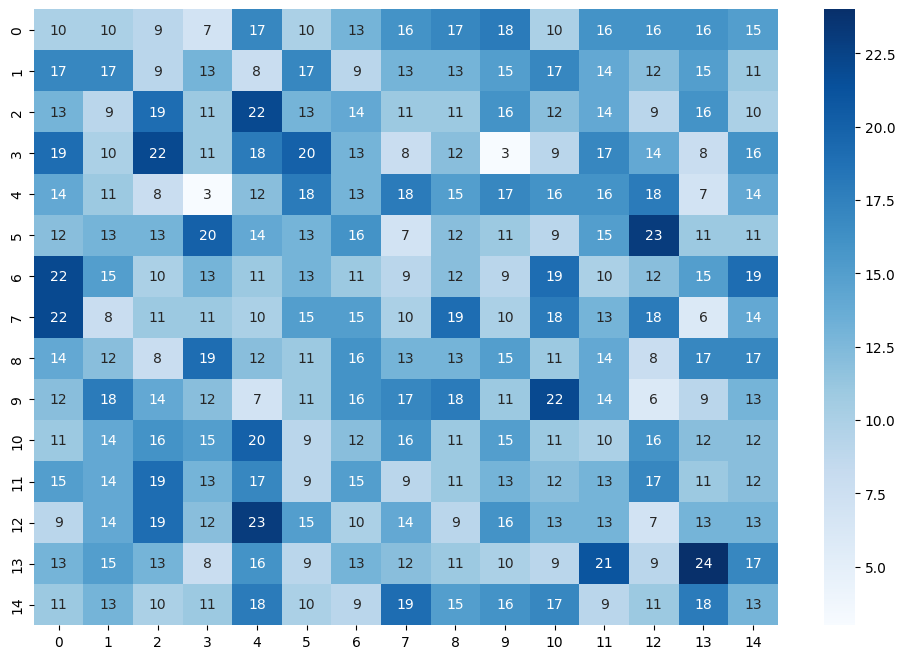

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [8]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

        Bean     0.0467    0.0500    0.0483       200
Bitter_Gourd     0.0881    0.0850    0.0865       200
Bottle_Gourd     0.0950    0.0950    0.0950       200
     Brinjal     0.0615    0.0550    0.0580       200
    Broccoli     0.0533    0.0600    0.0565       200
     Cabbage     0.0674    0.0650    0.0662       200
    Capsicum     0.0564    0.0550    0.0557       200
      Carrot     0.0521    0.0500    0.0510       200
 Cauliflower     0.0653    0.0650    0.0652       200
    Cucumber     0.0564    0.0550    0.0557       200
      Papaya     0.0537    0.0550    0.0543       200
      Potato     0.0622    0.0650    0.0636       200
     Pumpkin     0.0357    0.0350    0.0354       200
      Radish     0.1212    0.1200    0.1206       200
      Tomato     0.0628    0.0650    0.0639       200

    accuracy                         0.0650      3000
   macro avg     0.0652    0.0650

In [9]:
ytrue

array([ 0,  0,  0, ..., 14, 14, 14])

In [10]:
ypred

array([2, 9, 1, ..., 8, 1, 1], dtype=int64)

In [11]:
ypred.sort()

In [12]:
ypredsort=ypred.sort

In [13]:
ypredsort=ypred.sort()

In [14]:
ypredsort

In [15]:
print(ypredsort)

None


In [16]:
y_pred

array([2, 9, 1, ..., 8, 1, 1], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       200
           1       0.96      0.93      0.95       200
           2       0.96      0.96      0.96       200
           3       1.00      0.90      0.94       200
           4       0.89      1.00      0.94       200
           5       0.98      0.94      0.96       200
           6       1.00      0.97      0.99       200
           7       0.99      0.95      0.97       200
           8       0.95      0.95      0.95       200
           9       0.95      0.93      0.94       200
          10       0.93      0.95      0.94       200
          11       0.95      0.99      0.97       200
          12       0.99      0.97      0.98       200
          13       0.97      0.96      0.97       200
          14       0.97      1.00      0.98       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96

In [18]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.9346    1.0000    0.9662       200
           1     0.9637    0.9300    0.9466       200
           2     0.9650    0.9650    0.9650       200
           3     1.0000    0.8950    0.9446       200
           4     0.8889    1.0000    0.9412       200
           5     0.9793    0.9450    0.9618       200
           6     1.0000    0.9750    0.9873       200
           7     0.9948    0.9550    0.9745       200
           8     0.9548    0.9500    0.9524       200
           9     0.9487    0.9250    0.9367       200
          10     0.9268    0.9500    0.9383       200
          11     0.9522    0.9950    0.9731       200
          12     0.9949    0.9750    0.9848       200
          13     0.9747    0.9650    0.9698       200
          14     0.9662    1.0000    0.9828       200

    accuracy                         0.9617      3000
   macro avg     0.9630    0.9617

In [19]:
cm

array([[10, 10,  9,  7, 17, 10, 13, 16, 17, 18, 10, 16, 16, 16, 15],
       [17, 17,  9, 13,  8, 17,  9, 13, 13, 15, 17, 14, 12, 15, 11],
       [13,  9, 19, 11, 22, 13, 14, 11, 11, 16, 12, 14,  9, 16, 10],
       [19, 10, 22, 11, 18, 20, 13,  8, 12,  3,  9, 17, 14,  8, 16],
       [14, 11,  8,  3, 12, 18, 13, 18, 15, 17, 16, 16, 18,  7, 14],
       [12, 13, 13, 20, 14, 13, 16,  7, 12, 11,  9, 15, 23, 11, 11],
       [22, 15, 10, 13, 11, 13, 11,  9, 12,  9, 19, 10, 12, 15, 19],
       [22,  8, 11, 11, 10, 15, 15, 10, 19, 10, 18, 13, 18,  6, 14],
       [14, 12,  8, 19, 12, 11, 16, 13, 13, 15, 11, 14,  8, 17, 17],
       [12, 18, 14, 12,  7, 11, 16, 17, 18, 11, 22, 14,  6,  9, 13],
       [11, 14, 16, 15, 20,  9, 12, 16, 11, 15, 11, 10, 16, 12, 12],
       [15, 14, 19, 13, 17,  9, 15,  9, 11, 13, 12, 13, 17, 11, 12],
       [ 9, 14, 19, 12, 23, 15, 10, 14,  9, 16, 13, 13,  7, 13, 13],
       [13, 15, 13,  8, 16,  9, 13, 12, 11, 10,  9, 21,  9, 24, 17],
       [11, 13, 10, 11, 18, 10,  9

In [20]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

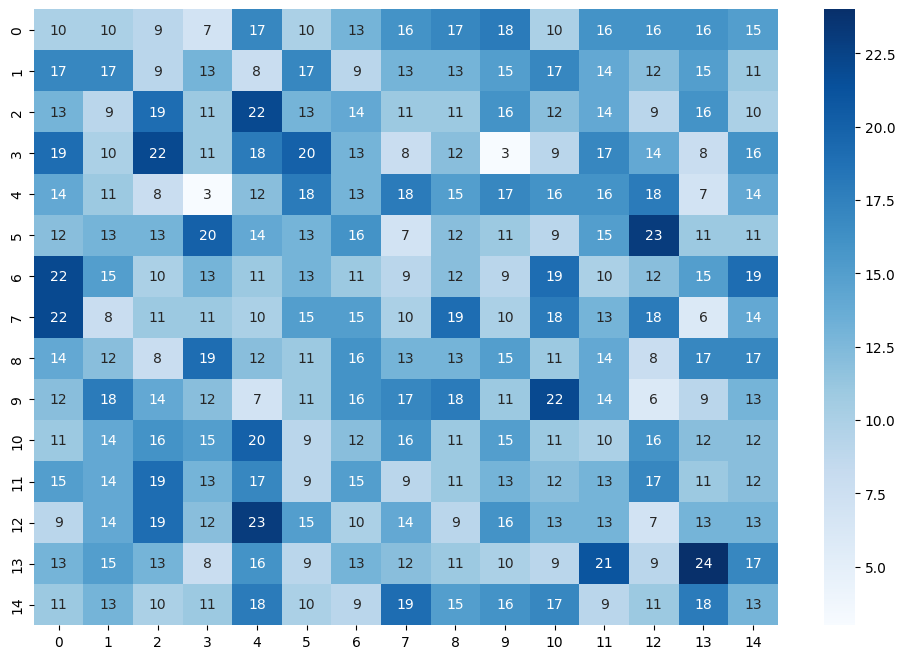

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [22]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.0467    0.0500    0.0483       200
           1     0.0881    0.0850    0.0865       200
           2     0.0950    0.0950    0.0950       200
           3     0.0615    0.0550    0.0580       200
           4     0.0533    0.0600    0.0565       200
           5     0.0674    0.0650    0.0662       200
           6     0.0564    0.0550    0.0557       200
           7     0.0521    0.0500    0.0510       200
           8     0.0653    0.0650    0.0652       200
           9     0.0564    0.0550    0.0557       200
          10     0.0537    0.0550    0.0543       200
          11     0.0622    0.0650    0.0636       200
          12     0.0357    0.0350    0.0354       200
          13     0.1212    0.1200    0.1206       200
          14     0.0628    0.0650    0.0639       200

    accuracy                         0.0650      3000
   macro avg     0.0652    0.0650

In [23]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.05      0.05      0.05       200
           1       0.09      0.09      0.09       200
           2       0.10      0.10      0.10       200
           3       0.06      0.06      0.06       200
           4       0.05      0.06      0.06       200
           5       0.07      0.07      0.07       200
           6       0.06      0.06      0.06       200
           7       0.05      0.05      0.05       200
           8       0.07      0.07      0.07       200
           9       0.06      0.06      0.06       200
          10       0.05      0.06      0.05       200
          11       0.06      0.07      0.06       200
          12       0.04      0.04      0.04       200
          13       0.12      0.12      0.12       200
          14       0.06      0.07      0.06       200

    accuracy                           0.07      3000
   macro avg       0.07      0.07

In [24]:
from sklearn.metrics import classification_report
clr = classification_report(cm,digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

TypeError: classification_report() missing 1 required positional argument: 'y_pred'

In [25]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, y_pred, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.0467    0.0500    0.0483       200
           1     0.0881    0.0850    0.0865       200
           2     0.0950    0.0950    0.0950       200
           3     0.0615    0.0550    0.0580       200
           4     0.0533    0.0600    0.0565       200
           5     0.0674    0.0650    0.0662       200
           6     0.0564    0.0550    0.0557       200
           7     0.0521    0.0500    0.0510       200
           8     0.0653    0.0650    0.0652       200
           9     0.0564    0.0550    0.0557       200
          10     0.0537    0.0550    0.0543       200
          11     0.0622    0.0650    0.0636       200
          12     0.0357    0.0350    0.0354       200
          13     0.1212    0.1200    0.1206       200
          14     0.0628    0.0650    0.0639       200

    accuracy                         0.0650      3000
   macro avg     0.0652    0.0650

In [26]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

        Bean     0.0467    0.0500    0.0483       200
Bitter_Gourd     0.0881    0.0850    0.0865       200
Bottle_Gourd     0.0950    0.0950    0.0950       200
     Brinjal     0.0615    0.0550    0.0580       200
    Broccoli     0.0533    0.0600    0.0565       200
     Cabbage     0.0674    0.0650    0.0662       200
    Capsicum     0.0564    0.0550    0.0557       200
      Carrot     0.0521    0.0500    0.0510       200
 Cauliflower     0.0653    0.0650    0.0652       200
    Cucumber     0.0564    0.0550    0.0557       200
      Papaya     0.0537    0.0550    0.0543       200
      Potato     0.0622    0.0650    0.0636       200
     Pumpkin     0.0357    0.0350    0.0354       200
      Radish     0.1212    0.1200    0.1206       200
      Tomato     0.0628    0.0650    0.0639       200

    accuracy                         0.0650      3000
   macro avg     0.0652    0.0650

In [27]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.0467    0.0500    0.0483       200
           1     0.0881    0.0850    0.0865       200
           2     0.0950    0.0950    0.0950       200
           3     0.0615    0.0550    0.0580       200
           4     0.0533    0.0600    0.0565       200
           5     0.0674    0.0650    0.0662       200
           6     0.0564    0.0550    0.0557       200
           7     0.0521    0.0500    0.0510       200
           8     0.0653    0.0650    0.0652       200
           9     0.0564    0.0550    0.0557       200
          10     0.0537    0.0550    0.0543       200
          11     0.0622    0.0650    0.0636       200
          12     0.0357    0.0350    0.0354       200
          13     0.1212    0.1200    0.1206       200
          14     0.0628    0.0650    0.0639       200

    accuracy                         0.0650      3000
   macro avg     0.0652    0.0650

In [28]:
test


In [29]:
test.labels

array([ 0,  0,  0, ..., 14, 14, 14])

In [30]:
confusion_matrix(Y_pred,test.labels)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [31]:
Y_pred

array([[1.3292831e-05, 4.2890363e-08, 9.9100566e-01, ..., 1.4795511e-08,
        9.4919648e-07, 1.0359386e-06],
       [7.0403180e-06, 8.1818158e-08, 3.6208025e-09, ..., 1.4084610e-08,
        1.2941736e-08, 4.4046863e-07],
       [6.6587148e-04, 9.9929845e-01, 1.4382245e-07, ..., 2.2816724e-07,
        7.8452950e-07, 1.7416646e-09],
       ...,
       [4.4288395e-06, 7.2089342e-08, 3.3589334e-10, ..., 1.6529058e-05,
        1.0033778e-05, 9.1854190e-08],
       [1.2350049e-03, 9.9769068e-01, 1.1102018e-05, ..., 3.8472539e-05,
        2.6933649e-05, 3.0516154e-07],
       [4.9639805e-03, 6.1128908e-01, 3.6474317e-05, ..., 4.6695536e-04,
        9.6931439e-03, 3.6558973e-05]], dtype=float32)

In [32]:
np.argmax(Y_pred,axis=1)

array([2, 9, 1, ..., 8, 1, 1], dtype=int64)

In [33]:
y_pred

array([2, 9, 1, ..., 8, 1, 1], dtype=int64)

In [34]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 64
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1./255
    # ,
    # validation_split=0.2
)

train = datagen.flow_from_directory(
    "Vegetable Images\\train",
    # subset="training",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Vegetable Images\\validation",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    # subset="validation",
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Vegetable Images\\test",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [35]:
model.evaluate_generator(test)

<ipython-input-35-964e3ff2598a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test)


[0.12408026307821274, 0.9713333249092102]

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-36-41aa956417fc>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test)


3000

In [37]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

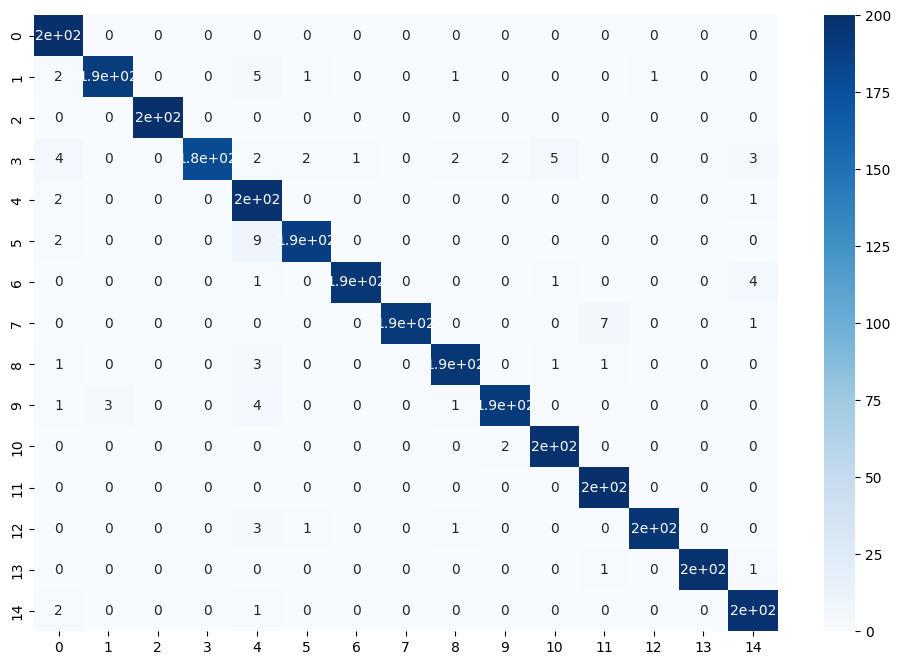

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [39]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.9346    1.0000    0.9662       200
           1     0.9845    0.9500    0.9669       200
           2     1.0000    1.0000    1.0000       200
           3     1.0000    0.8950    0.9446       200
           4     0.8756    0.9850    0.9271       200
           5     0.9793    0.9450    0.9618       200
           6     0.9949    0.9700    0.9823       200
           7     1.0000    0.9600    0.9796       200
           8     0.9749    0.9700    0.9724       200
           9     0.9795    0.9550    0.9671       200
          10     0.9659    0.9900    0.9778       200
          11     0.9569    1.0000    0.9780       200
          12     0.9949    0.9750    0.9848       200
          13     1.0000    0.9900    0.9950       200
          14     0.9517    0.9850    0.9681       200

    accuracy                         0.9713      3000
   macro avg     0.9728    0.9713

In [40]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [3]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history12 = model12.fit_generator(
    train,
    steps_per_epoch=2000,
    epochs=12,
    validation_data=val,
    validation_steps=500
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 128)      5

<ipython-input-3-cb158496bb91>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12 = model12.fit_generator(


 108/2000 [>.............................] - ETA: 7:06 - loss: 3.4565 - acc: 0.1852

KeyboardInterrupt: 

In [4]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [6]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history12 = model12.fit_generator(
    train,
    steps_per_epoch=2000,
    epochs=12,
    validation_data=val,
    validation_steps=500
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 74, 74, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_7 (Batc  (None, 74, 74, 128)     

<ipython-input-6-cb158496bb91>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12 = model12.fit_generator(


KeyboardInterrupt: 

In [ ]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history12 = model12.fit_generator(
    train,
    epochs=12,
    validation_data=val
)

: 

In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [3]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history12 = model12.fit_generator(
    train,
    epochs=12,
    validation_data=val
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 128)      5

<ipython-input-3-0eab3655f0f8>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12 = model12.fit_generator(


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\MTG\AppData\Local\Temp\ipykernel_16528\1405057179.py", line 28, in wrapper
      result = old_func(*args, **kwargs)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-3-0eab3655f0f8>", line 4, in <module>
      history12 = model12.fit_generator(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,128,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2585]

In [4]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [6]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history12 = model12.fit_generator(
    train,
    epochs=12,
    validation_data=val
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 74, 74, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_7 (Batc  (None, 74, 74, 128)     

<ipython-input-6-0eab3655f0f8>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12 = model12.fit_generator(


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_1/max_pooling2d_3/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\MTG\AppData\Local\Temp\ipykernel_16528\1405057179.py", line 28, in wrapper
      result = old_func(*args, **kwargs)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\MTG\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-6-0eab3655f0f8>", line 4, in <module>
      history12 = model12.fit_generator(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_1/max_pooling2d_3/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,128,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_1/max_pooling2d_3/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_5169]

In [7]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [9]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history12 = model12.fit_generator(
    train,
    epochs=12,
    validation_data=val
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 74, 74, 128)      512       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_13 (Bat  (None, 74, 74, 128)     

<ipython-input-9-0eab3655f0f8>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12 = model12.fit_generator(


1000/1000 [==============================] - 385s 382ms/step - loss: 1.7589 - acc: 0.5031 - val_loss: 11.8467 - val_acc: 0.2580
Epoch 2/12
1000/1000 [==============================] - 380s 380ms/step - loss: 1.0873 - acc: 0.6683 - val_loss: 1.3077 - val_acc: 0.6620
Epoch 3/12
1000/1000 [==============================] - 379s 379ms/step - loss: 0.8848 - acc: 0.7232 - val_loss: 1.8871 - val_acc: 0.5705
Epoch 4/12
1000/1000 [==============================] - 379s 379ms/step - loss: 0.7748 - acc: 0.7570 - val_loss: 3.1278 - val_acc: 0.3590
Epoch 5/12
1000/1000 [==============================] - 379s 379ms/step - loss: 0.7492 - acc: 0.7594 - val_loss: 4.7245 - val_acc: 0.3290
Epoch 6/12
1000/1000 [==============================] - 379s 379ms/step - loss: 0.6511 - acc: 0.7955 - val_loss: 1.9954 - val_acc: 0.5340
Epoch 7/12
1000/1000 [==============================] - 378s 378ms/step - loss: 0.6077 - acc: 0.8087 - val_loss: 1.2683 - val_acc: 0.6710
Epoch 8/12
1000/1000 [======================

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model12.predict_generator(test,250)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-10-6739ee69039c>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model12.predict_generator(test,250)


1000

In [11]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

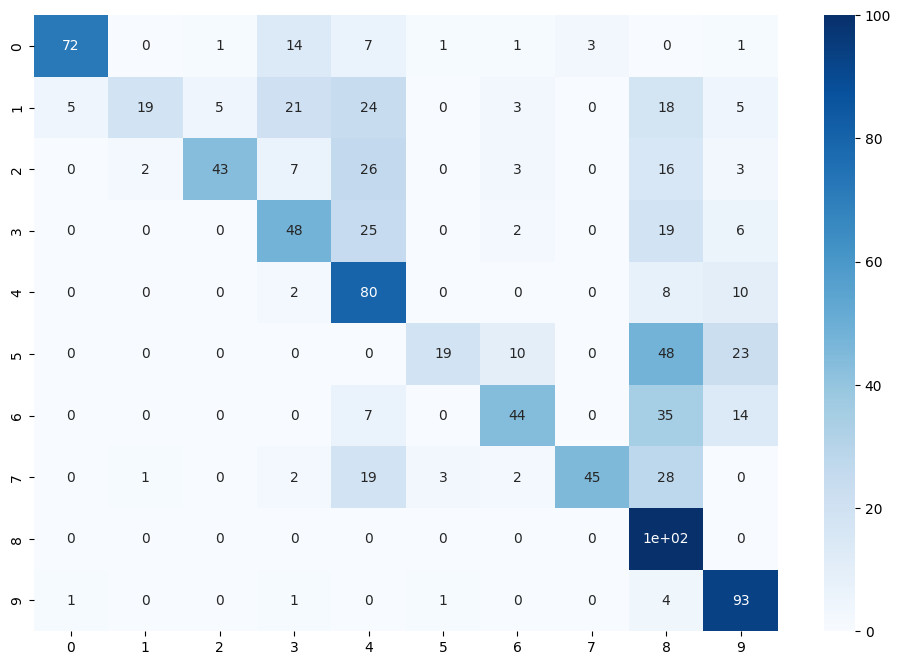

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [13]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.9231    0.7200    0.8090       100
                        Tomato___Early_blight     0.8636    0.1900    0.3115       100
                         Tomato___Late_blight     0.8776    0.4300    0.5772       100
                           Tomato___Leaf_Mold     0.5053    0.4800    0.4923       100
                  Tomato___Septoria_leaf_spot     0.4255    0.8000    0.5556       100
Tomato___Spider_mites Two-spotted_spider_mite     0.7917    0.1900    0.3065       100
                         Tomato___Target_Spot     0.6769    0.4400    0.5333       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.9375    0.4500    0.6081       100
                 Tomato___Tomato_mosaic_virus     0.3623    1.0000    0.5319       100
                             Tomato___healthy     0.6000    0.9300    0.7294      